In [235]:
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [12]:
pred = np.load('predictions2.npy')
trainIn = np.load('xTest.npy')
trainBoxes = np.load('yTest.npy')

In [63]:
pred[10]

array([0.8235189 , 0.73082954, 0.8884808 , 0.8422033 ], dtype=float32)

In [9]:
trainVals

array([[0.6712963 , 0.74074074, 0.75925926, 0.7962963 ],
       [0.87037037, 0.38888889, 0.90277778, 0.4212963 ],
       [0.87962963, 0.23611111, 0.9212963 , 0.28240741],
       ...,
       [1.00925926, 0.90277778, 1.05555556, 0.94444444],
       [1.18981481, 0.40277778, 1.24074074, 0.4537037 ],
       [1.36111111, 0.6712963 , 1.4212963 , 0.72685185]])

In [71]:
prediction1 = pred[100]
prediction20 = pred[100]

In [73]:
prediction1

array([249.53127, 117.61815, 276.91278, 140.89032], dtype=float32)

In [232]:
def plotBoxes(ind):
    fig, ax = plt.subplots(figsize=(16,16))
    pixelBox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = pixelBox.width, pixelBox.height
    img = trainIn[ind]
    print(img.shape)
    print(trainVals[ind])
    predBox = pred[ind] * 216
    box = trainVals[ind] * 216
    print(predBox)
    imgplot = plt.imshow(img)
    #boxes are xmin, ymin, xmax, ymax
    ax.add_patch(Rectangle((predBox[0], predBox[1]), predBox[2] - predBox[0], predBox[3]-predBox[1], ec='r', fc='none', lw=3))
    ax.add_patch(Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], ec='b', fc='none', lw=3))
    print(box)
    plt.show()
    fig.savefig('betterOne_2.jpg', dpi=800)

(216, 216, 3)
[0.78240741 0.7037037  0.83333333 0.75      ]
[177.88008 157.85918 191.91185 181.91592]
[169. 152. 180. 162.]


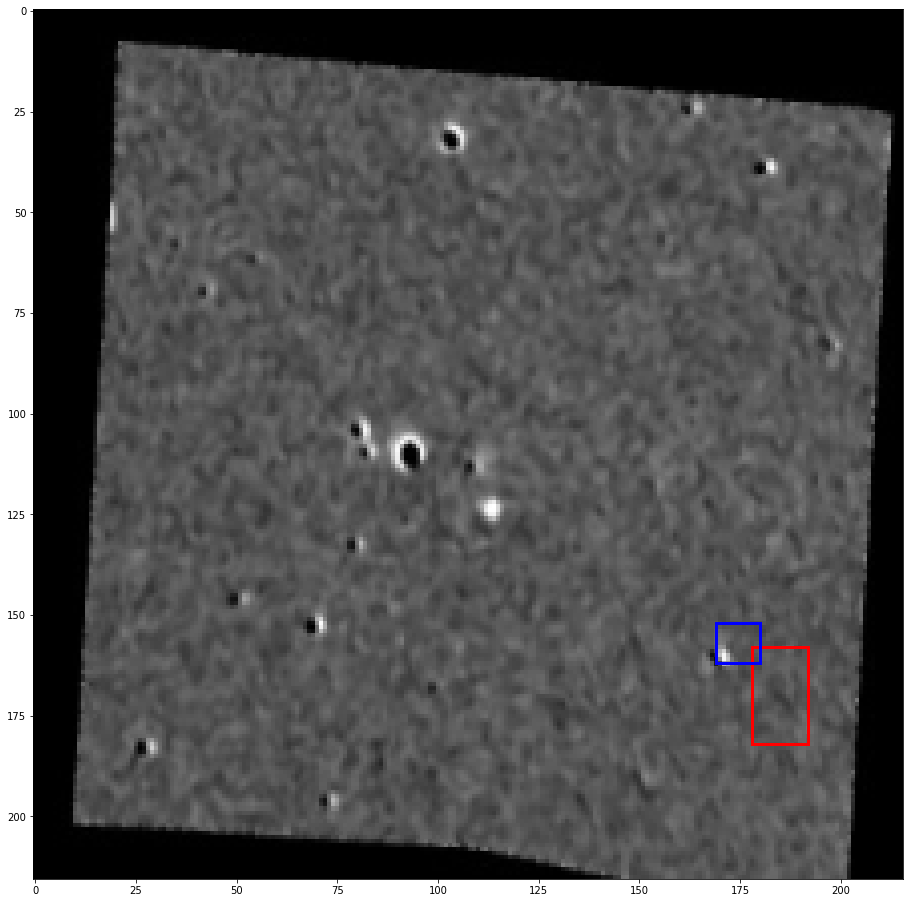

In [233]:
plotBoxes(10)

In [ ]:
#decent ones: 10, 301
#shows bad pieces: 302, 307

In [236]:
history = pd.read_csv('history2.csv')

In [237]:
history


,Unnamed: 0,loss,IOU,val_loss,val_IOU
0,0,1.131268,0.006213,1.093110,0.008818
1,1,1.116455,0.007774,1.138232,0.002854
2,2,1.115384,0.007293,1.106954,0.003943
3,3,1.112154,0.008445,1.099964,0.009247
4,4,1.109648,0.009643,1.092278,0.010634
5,5,1.109707,0.009746,1.093143,0.009625
6,6,1.107649,0.010074,1.093148,0.010776
7,7,1.107482,0.009419,1.087529,0.012591
8,8,1.106037,0.009637,1.090875,0.011617
9,9,1.107075,0.009738,1.094629,0.010999


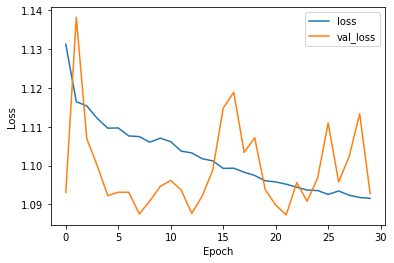

In [244]:
fig, ax = plt.subplots()
ax.plot(history['loss'], label='loss')
ax.plot(history['val_loss'], label='val_loss')
ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
fig.savefig('training_loss.jpg', dpi=800)

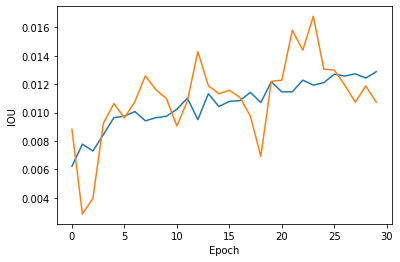

In [247]:
fig, ax = plt.subplots()
ax.plot(history['IOU'], label = 'IOU')
ax.plot(history['val_IOU'], label='val_IOU')
ax.set_xlabel("Epoch")
ax.set_ylabel("IOU")
fig.savefig('training_IOU.jpg', dpi=800)